# NYC Regents Exam Results Analysis


### Table of Contents
1. Introduction
2. Import libraries & Data Cleaning
3. Data Exploration and Visualization
4. Conclusion


#### 1. Introduction

This analysis provides insights on Regents Exam passing rates at West Brooklyn Community High School vs. South Brooklyn Community High School in the year 2016.

  
  The findings below are developed using historical data from the_2014-2015 to 2016-2017 School-Level NYC Regents Report_ published by NYC Department of Education (DOE).

#### 2.  Import Libraries & Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Import the csv file and replace any non-standard missing values.
<br>Then run a _head()_ function to get quick view of the data: 

In [2]:
missing_values = ['s']
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv',
                na_values = missing_values)
df.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1.0,6.3,15.0,93.8,7.0,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1.0,11.1,8.0,88.9,2.0,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,na,na


Identify all columns in the dataset. Select a subset of columns from the original dataset and rename:

In [3]:
df.columns

Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Number Scoring Below 65',
       'Percent Scoring Below 65', 'Number Scoring 65 or Above',
       'Percent Scoring 65 or Above', 'Number Scoring 80 or Above',
       'Percent Scoring 80 or Above', 'Number Scoring CR',
       'Percent Scoring CR'],
      dtype='object')

In [4]:
df0 = df.loc[:,['School Name','School Level', 'Regents Exam', 'Year','Total Tested','Mean Score',
                'Number Scoring 65 or Above','Percent Scoring 65 or Above',
                'Number Scoring 80 or Above','Percent Scoring 80 or Above']]
df1 = df0.rename(columns = {'School Name':'School Name' ,'School Level':'School Level', 'Regents Exam':'Regents Exam', 
                            'Year':'Year', 'Total Tested':'Total Tested','Mean Score': 'Average', 'Number Scoring 65 or Above': 'Number_passing',
                            'Percent Scoring 65 or Above': 'Percent_passing',
                            'Number Scoring 80 or Above': 'Number_80+','Percent Scoring 80 or Above':'Percent_80+'})
df1

,School Name,School Level,Regents Exam,Year,Total Tested,Average,Number_passing,Percent_passing,Number_80+,Percent_80+
0,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,NaN,NaN,NaN,NaN
1,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,15.0,93.8,7.0,43.8
2,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,8.0,88.9,2.0,22.2
3,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,NaN,NaN,NaN,NaN,NaN
4,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
212326,Icahn Charter School,K-8,Living Environment,2016,8,NaN,NaN,NaN,NaN,NaN
212327,Icahn Charter School,K-8,Living Environment,2016,5,NaN,NaN,NaN,NaN,NaN
212328,Icahn Charter School,K-8,Living Environment,2017,6,NaN,NaN,NaN,NaN,NaN
212329,Icahn Charter School,K-8,Living Environment,2017,4,NaN,NaN,NaN,NaN,NaN


After replacing all non-standard missing values with standard missing values at the _import data_ step, the following steps will replace all standard missing values with medians of the corresponding columns:

In [5]:
df1['Average'].fillna(df1['Average'].median(), inplace = True)
df1['Number_passing'].fillna(df1['Number_passing'].median(), inplace = True)
df1['Percent_passing'].fillna(df1['Percent_passing'].median(), inplace = True)
df1['Number_80+'].fillna(df1['Number_80+'].median(), inplace = True)
df1['Percent_80+'].fillna(df1['Percent_80+'].median(), inplace = True)
df1

,School Name,School Level,Regents Exam,Year,Total Tested,Average,Number_passing,Percent_passing,Number_80+,Percent_80+
0,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,65.4,21.0,59.8,5.0,12.5
1,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,15.0,93.8,7.0,43.8
2,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,8.0,88.9,2.0,22.2
3,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,65.4,21.0,59.8,5.0,12.5
4,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,65.4,21.0,59.8,5.0,12.5
...,...,...,...,...,...,...,...,...,...,...
212326,Icahn Charter School,K-8,Living Environment,2016,8,65.4,21.0,59.8,5.0,12.5
212327,Icahn Charter School,K-8,Living Environment,2016,5,65.4,21.0,59.8,5.0,12.5
212328,Icahn Charter School,K-8,Living Environment,2017,6,65.4,21.0,59.8,5.0,12.5
212329,Icahn Charter School,K-8,Living Environment,2017,4,65.4,21.0,59.8,5.0,12.5


Since the goal for this exploratory data analysis is to gain insight on Regents Exams performance of West Brooklyn Community High School and Brooklyn Frontiers High School in the year 2016, we can apply those limits on the data to reduce data size:

In [6]:
df2 = df1.loc[((df1['School Name'] == 'West Brooklyn Community High School')|
               (df1['School Name'] == 'South Brooklyn Community High School')) & (df1['Year'] == 2016)]
df2

,School Name,School Level,Regents Exam,Year,Total Tested,Average,Number_passing,Percent_passing,Number_80+,Percent_80+
9756,West Brooklyn Community High School,High school,Common Core Algebra,2016,14,57.4,3.0,21.4,0.0,0.0
9758,West Brooklyn Community High School,High school,Common Core English,2016,22,70.6,18.0,81.8,7.0,31.8
9760,West Brooklyn Community High School,High school,Common Core Geometry,2016,1,65.4,21.0,59.8,5.0,12.5
9762,West Brooklyn Community High School,High school,English,2016,17,69.5,15.0,88.2,2.0,11.8
9764,West Brooklyn Community High School,High school,Global History and Geography,2016,56,64.7,33.0,58.9,7.0,12.5
...,...,...,...,...,...,...,...,...,...,...
177066,South Brooklyn Community High School,High school,Physical Settings/Earth Science,2016,3,65.4,21.0,59.8,5.0,12.5
177075,South Brooklyn Community High School,High school,U.S. History and Government,2016,10,67.2,5.0,50.0,2.0,20.0
177076,South Brooklyn Community High School,High school,U.S. History and Government,2016,21,71.8,14.0,66.7,9.0,42.9
177077,South Brooklyn Community High School,High school,U.S. History and Government,2016,2,65.4,21.0,59.8,5.0,12.5


#### 3. Data Exploration and Visualization

First, let's look at the Regents Exam pass rates at West Brooklyn Community High School

In [7]:
df3 = df2.loc[(df2['School Name'] == 'West Brooklyn Community High School') & 
              (df2['Year'] == 2016)]
df3.groupby(['Regents Exam'])['Percent_passing'].mean()

Regents Exam
Common Core Algebra             44.530000
Common Core English             71.266667
Common Core Geometry            59.800000
English                         75.472727
Global History and Geography    60.584615
Integrated Algebra              57.854545
Living Environment              73.758333
U.S. History and Government     61.500000
Name: Percent_passing, dtype: float64

We can conclude that in 2016, West Brooklyn Community High School had high passing rates (above 70%) in Common Core English, English, and Living Envirornment. The subject with the highest passing rate is English (75.47%). and the subject with the lowest passing rate is Common Core Algebra (44.53%).
<br> 
The results above can also be demonstrated using a bar graph:

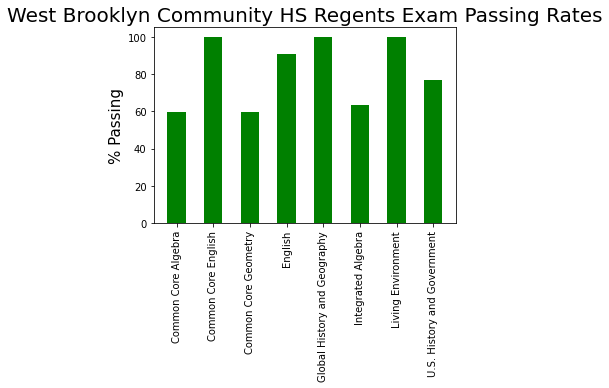

In [8]:
x = df3['Regents Exam']
y = df3['Percent_passing']

fig, ax = plt.subplots()

plt.bar(x,y, width = 0.5, color = 'green')
plt.title('West Brooklyn Community HS Regents Exam Passing Rates',fontsize = 20)
#plt.xlabel('Subject', fontsize = 15)
plt.ylabel('% Passing',fontsize = 15)

plt.xticks(rotation = 90)
fig.subplots_adjust(bottom = 0.2, left = 0.2)

Similarly, we can summarize regents exam results from South Brooklyn Community High School:

In [9]:
df4 = df2.loc[(df2['School Name'] == 'South Brooklyn Community High School') & 
              (df2['Year'] == 2016)]
df4.groupby(['Regents Exam'])['Percent_passing'].mean()

Regents Exam
Common Core Algebra                55.622222
Common Core English                70.650000
Common Core Geometry               53.155556
English                            59.800000
Global History and Geography       40.536364
Integrated Algebra                 51.915385
Living Environment                 59.010000
Physical Settings/Earth Science    53.155556
U.S. History and Government        59.254545
Name: Percent_passing, dtype: float64

The summary above suggests that the highest passing subject at South Brooklyn Community High School is Common Core English (70.65%), and the subject with the lowest passing rate is Global History and Geography (40.54%).
<br> 
Here is a graphical representation of the above results:

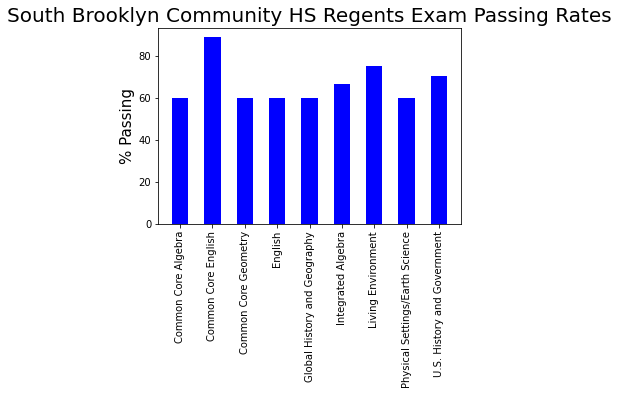

In [10]:
x = df4['Regents Exam']
y = df4['Percent_passing']

fig, ax = plt.subplots()

plt.bar(x,y, width = 0.5, color = 'Blue')
plt.title('South Brooklyn Community HS Regents Exam Passing Rates',fontsize = 20)
#plt.xlabel('Subject', fontsize = 15)
plt.ylabel('% Passing',fontsize = 15)

plt.xticks(rotation = 90)
fig.subplots_adjust(bottom = 0.2, left = 0.2)

Additionally, we can compute the passing rate across all subjects at each school in the year 2016:


In [11]:
print("The average passing rate for all subjects at West Brooklyn Community High School is: "+"{:.2%}".format(df3['Percent_passing'].mean()/100))
      
print("The average passing rate for all subjects at South Brooklyn Community High School is: "+"{:.2%}".format(df4['Percent_passing'].mean()/100))

The average passing rate for all subjects at West Brooklyn Community High School is: 63.68%
The average passing rate for all subjects at South Brooklyn Community High School is: 55.81%


#### 4. Conclusion
We can conclude from the descriptive statistics and graphs above, that South Brooklyn Community High School has lower passing rates both by subject and overall compared to West Brooklyn Community High School. 

<br>
Note that the aboves results only reflect regents exam performance in 2016. Additional analysis on the year-over-year performance at each school could provide useful insights and help develop strategies to improve regents exam performance.